In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import seaborn as sn
import warnings
from sklearn.exceptions import DataConversionWarning
from yellowbrick.regressor import ManualAlphaSelection
from yellowbrick.regressor import AlphaSelection
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import preprocessing

warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
%matplotlib inline

In [ ]:
df=pd.read_csv("/content/SeoulBikeData.csv",encoding='unicode_escape')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
df['WeekDay']=df['Date'].dt.day_name()

In [ ]:
df['Month']=df['Date'].dt.month

In [ ]:
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}

df['WeekDayEncoding']=df['WeekDay'].map(mapping_dictDay)

In [ ]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Month,WeekDayEncoding
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,4
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,4
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,11,5


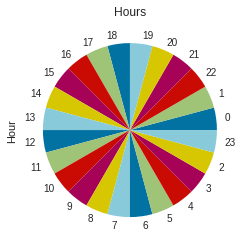

In [ ]:
plt.title("Hours")
df['Hour'].value_counts().plot(kind='pie')
plt.show()

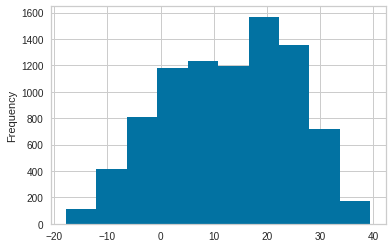

In [ ]:
df['Temperature(°C)'].plot(kind='hist')
plt.show()

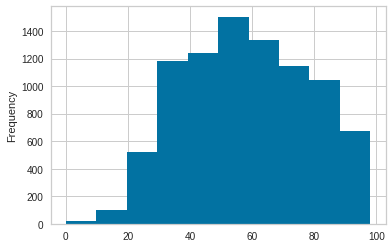

In [ ]:
df['Humidity(%)'].plot(kind='hist')
plt.show()

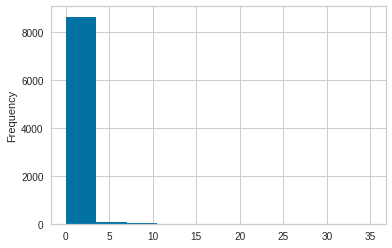

In [ ]:
df['Rainfall(mm)'].plot(kind='hist')
plt.show()

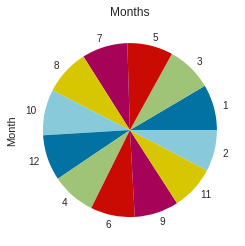

In [ ]:
plt.title("Months")
df['Month'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
df.skew().sort_values(ascending=True) # Snowfall and Rainfall are highly skewed

Visibility (10m)             -0.701786
Dew point temperature(°C)    -0.367298
Temperature(°C)              -0.198326
Month                        -0.010458
Hour                          0.000000
WeekDayEncoding               0.000688
Humidity(%)                   0.059579
Wind speed (m/s)              0.890955
Rented Bike Count             1.153428
Solar Radiation (MJ/m2)       1.504040
Snowfall (cm)                 8.440801
Rainfall(mm)                 14.533232
dtype: float64

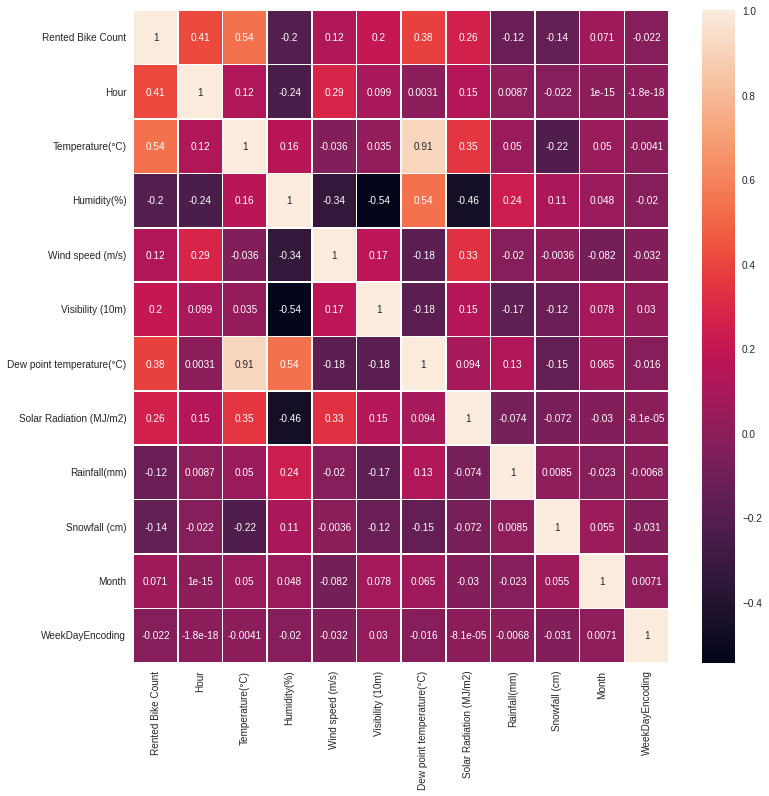

In [ ]:
corrMatrix = df.corr()

fig, ax = plt.subplots(figsize=(12,12)) # Sample figsize in inches
sn.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

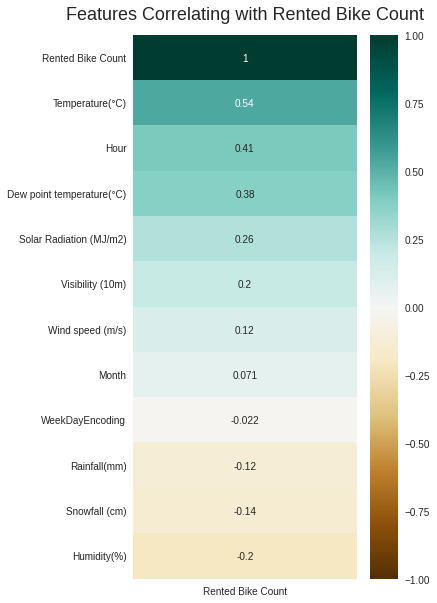

In [ ]:
plt.figure(figsize=(5, 10))
heatmap = sn.heatmap(corrMatrix[['Rented Bike Count']].sort_values(by='Rented Bike Count', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Rented Bike Count', fontdict={'fontsize':18}, pad=16);

In [ ]:
rented_bike_corr = pd.DataFrame(corrMatrix.iloc[:, 0])
significant = rented_bike_corr[abs(rented_bike_corr) >= 0.05]
significant['Use'] = significant['Rented Bike Count'].notna()
significant_col = significant.index[significant['Use']].tolist()
significant_col.remove('Rented Bike Count')
significant_col.remove('Dew point temperature(°C)') # Due to high correlation with regular temperature
significant_col.remove('Rainfall(mm)') # Highly skewed towards 0
significant_col.remove('Snowfall (cm)') # Highly skewed towards 0
significant_col

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Month']

In [ ]:
df[significant_col]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Month
0,0,-5.2,37,2.2,2000,0.0,1
1,1,-5.5,38,0.8,2000,0.0,1
2,2,-6.0,39,1.0,2000,0.0,1
3,3,-6.2,40,0.9,2000,0.0,1
4,4,-6.0,36,2.3,2000,0.0,1
...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,0.0,11
8756,20,3.4,37,2.3,2000,0.0,11
8757,21,2.6,39,0.3,1968,0.0,11
8758,22,2.1,41,1.0,1859,0.0,11


In [ ]:
X = df[significant_col]
y = df['Rented Bike Count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(linreg.intercept_, linreg.coef_)

412.8192755040648 [ 2.66161766e+01  3.14048217e+01 -8.15887066e+00  9.11338521e+00
  2.06858745e-02 -8.16839802e+01  9.63193972e+00]


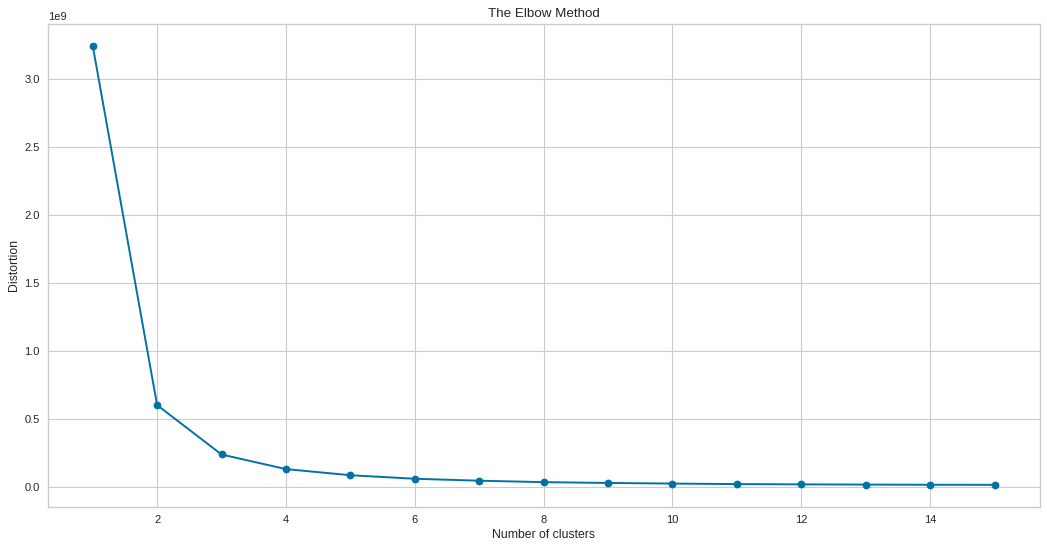

In [ ]:
# calculate distortion for a range of number of cluster
distortions = []
figure(figsize=(16, 8), dpi=80)

for i in range(1, 16):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 16), distortions, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=0,).fit(X) # By using an Elbow Method for K-means clustering we find the optimal number of clusters to be = 4
X['cluster'] = kmeans.labels_
X.cluster.value_counts()

0    4372
3    1492
1    1487
2    1409
Name: cluster, dtype: int64

In [ ]:
centroids = np.array(kmeans.cluster_centers_)
centroids = PCA(n_components=2).fit_transform(centroids)

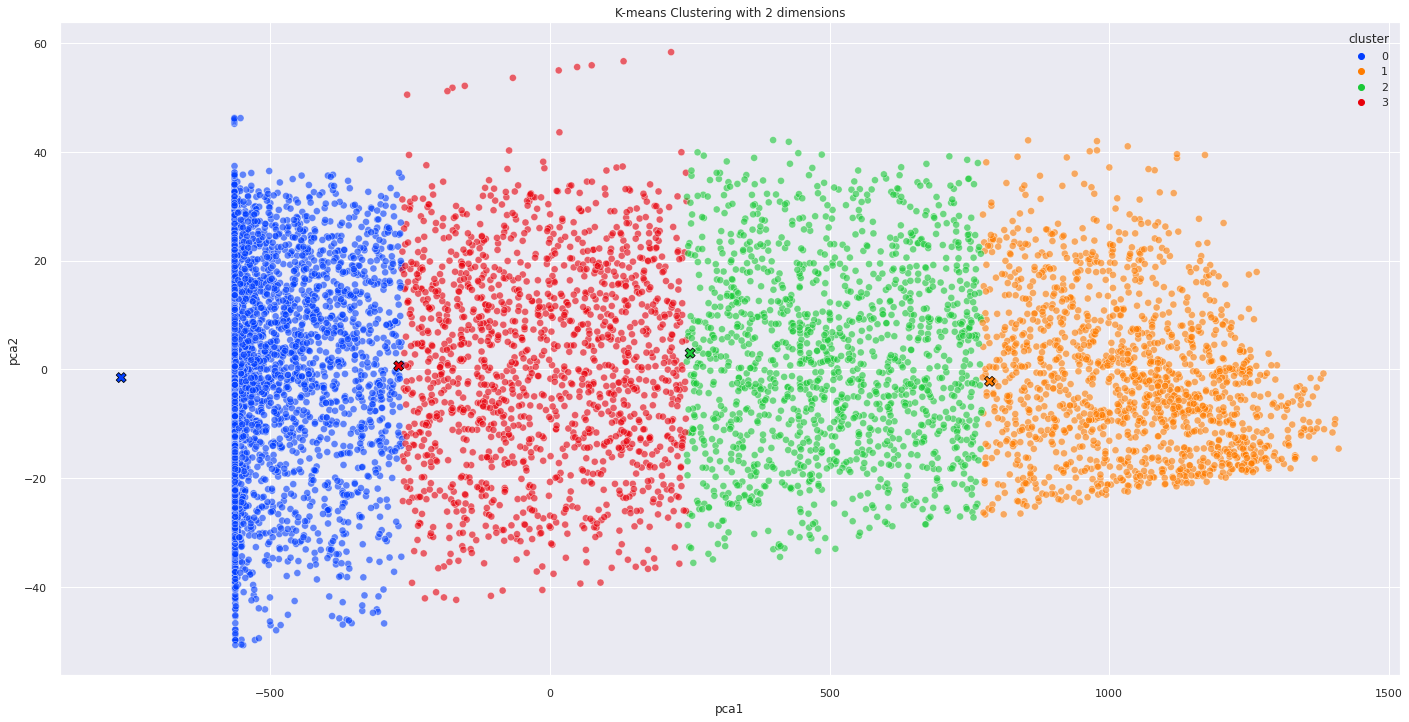

In [ ]:
# Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
ax = sn.set(rc={"figure.figsize":(24, 12)})
ax = sn.scatterplot(x="pca1", y="pca2", hue=X['cluster'], data=results, palette="bright", alpha=0.6, s=50, legend='full')
ax = sn.scatterplot(centroids_x, centroids_y, hue=range(kmeans.n_clusters),s=100, palette="bright", ec='black', legend=False, marker='X',ax=ax)
#ax.set_xscale('log')
plt.title('K-means Clustering with 2 dimensions')
plt.show()